In [1]:
import os

import matplotlib.pyplot as plt

from pyfvs.fvs import FVS
from pyfvs.keywords import keywords as kwds

%matplotlib inline

In [2]:
variant = 'PN'
workspace = 'c:/temp/pyfvs'

try:
    os.makedirs(workspace)
except:
    pass

In [113]:
kws  = kwds.KeywordSet('Benchmarking')

kws += kwds.NUMCYCLE(20)
kws += kwds.STDINFO(elev_code=500,slope=30,aspect=125, location=612)
kws += kwds.DESIGN(small_tree_exp=1,break_dbh=9999,sample_size=10)
kws += kwds.SITECODE('DF', 100)
# kws += kwds.SDIMAX('DF', 560)
kws += kwds.MORTMULT(0,'DF', 10)
kws += kwds.VOLEQNUM('DF','F00FW2W202','F00FW2W202')
kws += kwds.NOTREES()

estab = kwds.ESTAB()
estab += kwds.PLANT(1,'DF',300)

kws += estab

print(kws)

Elevation code 500 is greater than 99, assuming feet
NUMCYCLE          20
STDINFO          612                   0       125        30         5          
DESIGN                     1.0    9999.0        10                              
SITECODE          DF       100          
MORTMULT           0   PARMS(DF, 10.0000, 0.0, 999.9)

VOLEQNUM          DFF00FW2W202F00FW2W202
NOTREES   
ESTAB              0
PLANT              1        DF       300       100         2    0.0000         0
END
! End ESTAB




In [114]:
# %%timeit
# %prun
mod = FVS('PN', workspace=workspace)
mod.keywords = kws
mod.run()

In [115]:
sum = mod.summary
sum['qmd'] = ((sum['baa']/sum['tpa']/0.005454154)**0.5).round(1)
sum['sdi'] = ((sum['qmd']/10)**1.605 * sum['tpa']).round(1)
sum.loc[:,['year','age','tpa','baa','sdi','qmd','ccf','top_ht','tcuft','mcuft','mbdft']]

,year,age,tpa,baa,sdi,qmd,ccf,top_ht,tcuft,mcuft,mbdft
0,0,0,0,0,NaN,NaN,0,0,0,0,0
1,10,10,300,5,17.5,1.7,29,20,0,0,0
2,20,20,110,18,42.1,5.5,35,43,311,0,0
3,30,30,79,54,94.8,11.2,72,64,1256,1066,4797
4,40,40,70,97,147.3,15.9,116,81,2726,2446,12036
5,50,50,64,139,194.7,20.0,156,96,4441,4074,21995
6,60,60,60,177,233.2,23.3,191,108,6183,5694,33093
7,70,70,57,209,262.6,25.9,220,118,7827,7269,44104
8,80,80,53,236,286.2,28.6,244,127,9337,8732,55320
9,90,90,50,259,304.2,30.8,264,134,10655,9958,64837


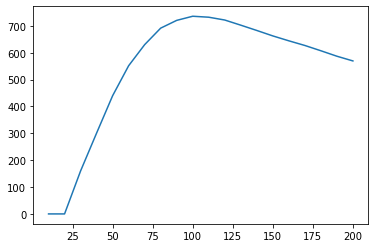

In [116]:
x = mod.summary['age']
y = mod.summary['mbdft']/x

plt.plot(x,y)